### Importing dependencies 

In [39]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

### Gathering and Exploring data

In [4]:
df_train_identity=pd.read_csv(r'C:\Users\rkumar35\Siraj Course\Week 3 Homework\train_identity.csv')
df_train_transaction=pd.read_csv(r'C:\Users\rkumar35\Siraj Course\Week 3 Homework\train_transaction.csv')

In [5]:
df_train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [6]:
df_train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_train_identity.shape

(144233, 41)

In [9]:
df_train_transaction.shape

(590540, 394)

In [10]:
df_train_full = pd.merge(df_train_transaction, df_train_identity, on='TransactionID', how='left')
df_train_full

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_train_full.shape

(590540, 434)

In [14]:
df_train_full['isFraud']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
590510    0
590511    0
590512    0
590513    0
590514    0
590515    0
590516    0
590517    0
590518    0
590519    0
590520    0
590521    0
590522    0
590523    0
590524    0
590525    0
590526    1
590527    0
590528    0
590529    0
590530    0
590531    0
590532    0
590533    0
590534    0
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int64

In [13]:
len(df_train_full[df_train_full["isFraud"]==1])/len(df_train_full)*100

3.4990009144173126

### Visualizing

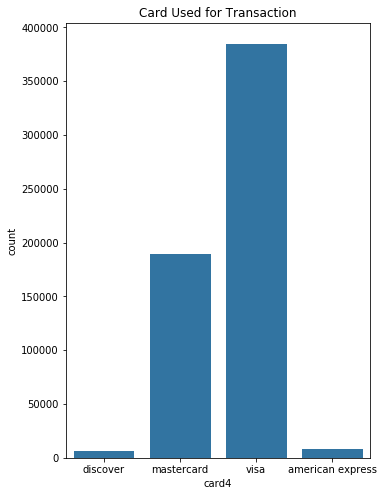

In [29]:
#visualizing card used for transactions using barplot
plt.figure(figsize = [12, 8])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.title('Card Used for Transaction')
base_color=sns.color_palette()[0]
sns.countplot(data = df_train_full,x='card4',color=base_color);

### Data Preprocessing

In [33]:
# Handling NAs
columns_def=pd.DataFrame({"na_count":df_train_full.isnull().sum().sort_values(ascending=False)})
columns_def["per"]=columns_def["na_count"]/len(df_train_full)
range=[0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]
for i in range: 
    print (columns_def[columns_def["per"]<i].shape[0]/df_train_full.shape[1])

0.25806451612903225
0.25806451612903225
0.3686635944700461
0.41935483870967744
0.46543778801843316
0.5207373271889401
0.5207373271889401


In [34]:
#only columns with less than 10% NA will remain 
limit=0.10
#Select final columns
columns_final=columns_def[columns_def["per"]<limit].index 

df_train_full=df_train_full[df_train_full.columns.intersection(columns_final)]

## Dealing with Categorical Variables

In [35]:
#Show categorical variables
df_train_full[df_train_full.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
5,W,visa,debit
6,W,visa,debit
7,W,visa,debit
8,H,visa,debit
9,W,mastercard,debit


In [36]:
df_train_full.shape

(590540, 112)

In [37]:
card6_dummy_df=pd.get_dummies(df_train_full["card6"])
df_train_full=pd.concat([df_train_full,card6_dummy_df],axis=1)
df_train_full=df_train_full._get_numeric_data()
df_train_full=df_train_full.dropna()

len(df_train_full[df_train_full["isFraud"]==1])/len(df_train_full)*100

3.46278261170406

In [38]:
x_full_df=df_train_full.drop(["isFraud"],axis=1)
y_full_df=df_train_full["isFraud"]
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.50)

### Using logistic regression to train our dataset

In [40]:
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)  

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
lr.score(X_test, y_test)

0.9655659153419017

In [42]:
#prediciting 

y_pred=lr.predict(X_test)

In [43]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,279092,279092
1,9953,9953
All,289045,289045


In [44]:
recall_score(y_test, y_pred)

0.0

In [45]:
accuracy_score(y_test, y_pred)

0.9655659153419017

### References
*   (https://www.data-blogger.com/2017/06/15/fraud-detection-a-simple-machine-learning-approach/)
*   (https://github.com/mannybernabe/intro_fraud_detection)
* [https://www.kaggle.com/c/ieee-fraud-detection/overview]